### Machine Learning and Data Analysis 
#### Final Project: Classification of a Navigation Robot Sensor Dataset Using SVM, Random Forest and Neural Network

Authors: 
- Ali Yousefi (5265866), Robotics Engineering
- Mohammad Reza Haji Hosseini (4394567), Robotics Engineering



#### 1. Dataset Description
The [data](https://www.kaggle.com/datasets/uciml/wall-following-robot) used in this project, were collected as the SCITOS G5 navigated through the room following the wall in a clockwise direction, for 4 rounds. To navigate, the robot uses 24 ultrasound sensors arranged circularly around its "waist". Robot movements are considered in four classes as: Move-Forward, Slight-Right-Turn, Sharp-Right-Turn, Slight-Left-Turn

In this project, three data-set files were used, with the same class labels, but different number of features:

- The first one contains the raw values of the measurements of all 24 ultrasound sensors and the corresponding class label (Moving forward, turning left, etc). Sensor readings are sampled at a rate of 9 samples per second.
- The second one contains four sensor readings named 'simplified distances' and the corresponding class label l (Moving forward, turning left, etc). These simplified distances are referred to as the 'front distance', 'left distance', 'right distance' and 'back distance'. They consist, respectively, of the minimum sensor readings among those within 60 degree arcs located at the front, left, right and back parts of the robot.
- The third one contains only the front and left simplified distances and the corresponding class label (Moving forward, turning left, etc).


#### 2. Multi-class classification with 2 dimensional data usging SVM and Random Forest
Considering the third data set, since we only have two features (front and left simplified distances), the number of features are less than class labels. In the first step, the data is imported and devided into features and class labels. Then we have used 500 samples for the train and 100 samples for the test set. The final step in data pre-processing was to normalize the features using a min max scaler. 

Since the problem is a multi-class classification, the SVM algorithm was chosen, considering the fact that it uses hinge loss instead of square loss, and it does one-vs-rest (ovr) implicitly. In order to implement an SVM model on the data, first we have tried to find the best value for regularization parameter, using 10% of train dataset as cross validation set. The kernel type for this particular dataset could be chosen a linear kernel since it has a desirable performance. Considering the above mentioned conditions, the SVM model could be easily fitted on the train set using the corresponding function.

The random forest algorithm had also a good performance on this particular data set. This method is an ensamble algorithm which implements a large number of individual decision tress on the train dataset (boosting) and then chooses the features among these tress in a random manner (bagging). The number of trees for this project was chosen to be 1000.

In the end, the results are shown both in a scatter plot (since we have 2 dimensional data) and a confusion matrix.

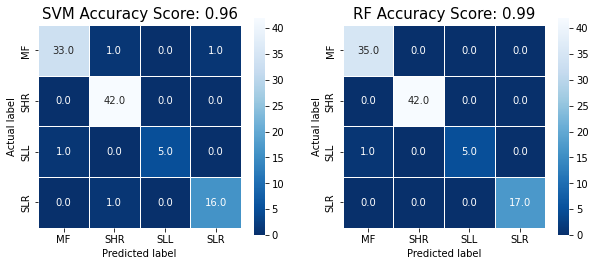

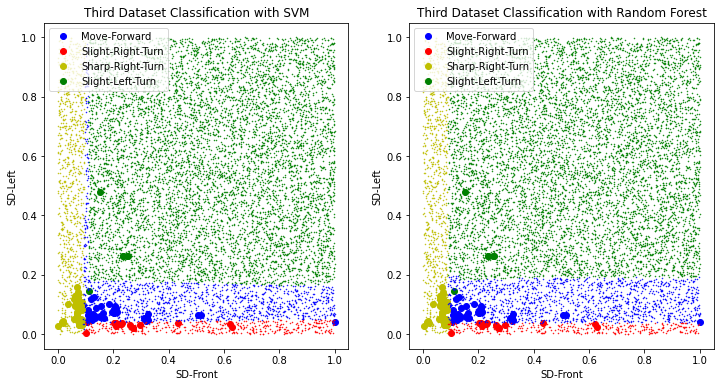

In [4]:
# ----------   IMPORT THIRD DATA-SET   --------------
import pandas as pd
import numpy as np

sensor_data = pd.read_csv('Dataset/sensor_readings_2.csv')
sensor_data = sensor_data.sample(frac=1)  # shuffle the dataset
sensor_data = sensor_data.to_numpy()
ix = range(0, 2)
iy = 2
nl = 500
nt = 100
X = sensor_data[:, ix]
Y = sensor_data[:, iy]
XL = X[range(0, nl), :]
YL = Y[range(0, nl)]
XT = X[range(nl, nl + nt), :]
YT = Y[range(nl, nl + nt)]

# ----------   PRE-PROCESSING   --------------
from sklearn import preprocessing

scalerX = preprocessing.MinMaxScaler()
# normalize the features
XL = scalerX.fit_transform(XL)
XT = scalerX.transform(XT)

# ----------   LEARN THE DATA   --------------
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

grid = {'C': np.logspace(-4,3,5),
        'kernel': ['linear']}

# find the best value for C (regularization parameter) and kernel type using cross validation set 
MS = GridSearchCV(estimator = SVC(),
                  param_grid = grid,
                  scoring = 'balanced_accuracy',
                  cv = 10,
                  verbose = 0)
H = MS.fit(XL,YL)

svm_clsf = SVC(C = H.best_params_['C'],
        kernel = H.best_params_['kernel'])

# train the SVM classifier model
svm_clsf.fit(XL,YL)

# train the random forrest classifier model
rf_clsf = RandomForestClassifier(n_estimators = 1000)
rf_clsf.fit(XL,YL)

# ----------   TEST THE MODEL   --------------
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
import numpy.matlib as nml

YP_svm = svm_clsf.predict(XT)
YP_rf = rf_clsf.predict(XT)

# display confusion matrix (MF: move-forward, SLR: slight-right-turn, SHR: sharp-right-turn, SLL: slight-left-turn)
plt.figure(figsize=(10,4))
ax1 = plt.subplot(121)
sb.heatmap(confusion_matrix(YT, YP_svm), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r')
ax1.set_ylabel('Actual label')
ax1.set_xlabel('Predicted label')
plt.xticks([0.5,1.5,2.5,3.5], ['MF', 'SHR', 'SLL', 'SLR'])
plt.yticks([0.5,1.5,2.5,3.5], ['MF', 'SHR', 'SLL', 'SLR'])
all_sample_title = 'SVM Accuracy Score: {0}'.format(accuracy_score(YT, YP_svm))
ax1.set_title(all_sample_title, size = 15)
ax2 = plt.subplot(122)
sb.heatmap(confusion_matrix(YT, YP_rf), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r')
ax2.set_ylabel('Actual label')
ax2.set_xlabel('Predicted label')
plt.xticks([0.5,1.5,2.5,3.5], ['MF', 'SHR', 'SLL', 'SLR'])
plt.yticks([0.5,1.5,2.5,3.5], ['MF', 'SHR', 'SLL', 'SLR'])
all_sample_title = 'RF Accuracy Score: {0}'.format(accuracy_score(YT, YP_rf))
ax2.set_title(all_sample_title, size = 15)

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
ns = 10000
XS = nml.rand(ns, 2)
YS = svm_clsf.predict(XS)
ax1.plot(XT[(YT=='Move-Forward').flatten(),0], XT[(YT=='Move-Forward').flatten(),1],'bo', label='Move-Forward')
ax1.plot(XT[(YT=='Slight-Right-Turn').flatten(),0], XT[(YT=='Slight-Right-Turn').flatten(),1],'ro', label='Slight-Right-Turn')
ax1.plot(XT[(YT=='Sharp-Right-Turn').flatten(),0], XT[(YT=='Sharp-Right-Turn').flatten(),1],'yo', label='Sharp-Right-Turn')
ax1.plot(XT[(YT=='Slight-Left-Turn').flatten(),0], XT[(YT=='Slight-Left-Turn').flatten(),1],'go', label='Slight-Left-Turn')
ax1.plot(XS[(YS=='Move-Forward').flatten(),0], XS[(YS=='Move-Forward').flatten(),1],'bo', markersize=.5)
ax1.plot(XS[(YS=='Slight-Right-Turn').flatten(),0], XS[(YS=='Slight-Right-Turn').flatten(),1],'ro', markersize=.5)
ax1.plot(XS[(YS=='Sharp-Right-Turn').flatten(),0], XS[(YS=='Sharp-Right-Turn').flatten(),1],'yo', markersize=.5)
ax1.plot(XS[(YS=='Slight-Left-Turn').flatten(),0], XS[(YS=='Slight-Left-Turn').flatten(),1],'go', markersize=.5)
ax1.set_title('Third Dataset Classification with SVM')
ax1.set_xlabel('SD-Front')
ax1.set_ylabel('SD-Left')
ax1.legend()

ax2 = plt.subplot(122)
YS = rf_clsf.predict(XS)
ax2.plot(XT[(YT=='Move-Forward').flatten(),0], XT[(YT=='Move-Forward').flatten(),1],'bo', label='Move-Forward')
ax2.plot(XT[(YT=='Slight-Right-Turn').flatten(),0], XT[(YT=='Slight-Right-Turn').flatten(),1],'ro', label='Slight-Right-Turn')
ax2.plot(XT[(YT=='Sharp-Right-Turn').flatten(),0], XT[(YT=='Sharp-Right-Turn').flatten(),1],'yo', label='Sharp-Right-Turn')
ax2.plot(XT[(YT=='Slight-Left-Turn').flatten(),0], XT[(YT=='Slight-Left-Turn').flatten(),1],'go', label='Slight-Left-Turn')
ax2.plot(XS[(YS=='Move-Forward').flatten(),0], XS[(YS=='Move-Forward').flatten(),1],'bo', markersize=.5)
ax2.plot(XS[(YS=='Slight-Right-Turn').flatten(),0], XS[(YS=='Slight-Right-Turn').flatten(),1],'ro', markersize=.5)
ax2.plot(XS[(YS=='Sharp-Right-Turn').flatten(),0], XS[(YS=='Sharp-Right-Turn').flatten(),1],'yo', markersize=.5)
ax2.plot(XS[(YS=='Slight-Left-Turn').flatten(),0], XS[(YS=='Slight-Left-Turn').flatten(),1],'go', markersize=.5)
ax2.set_title('Third Dataset Classification with Random Forest')
ax2.set_xlabel('SD-Front')
ax2.set_ylabel('SD-Left')
ax2.legend()
plt.show()

#### 3. Multi-class classification with 4 dimensional data usging SVM and Random Forest
In the case we consider the second dataset, number of features would be equal to the class labels. It can be observed that our classification models have almost the same performance on this dataset as well.

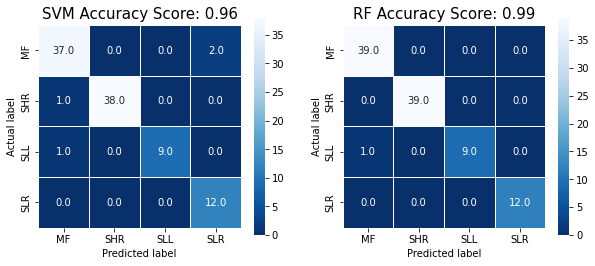

In [5]:
# ----------   IMPORT SECOND DATA-SET   --------------
import pandas as pd
import numpy as np

sensor_data = pd.read_csv('Dataset/sensor_readings_4.csv')
sensor_data = sensor_data.sample(frac=1) # shuffle the dataset
sensor_data = sensor_data.to_numpy()
ix = range(0, 4)
iy = 4
nl = 500
nt = 100
X = sensor_data[:, ix]
Y = sensor_data[:, iy]
XL = X[range(0, nl), :]
YL = Y[range(0, nl)]
XT = X[range(nl, nl + nt), :]
YT = Y[range(nl, nl + nt)]

# ----------   PRE-PROCESSING   --------------
from sklearn import preprocessing

scalerX = preprocessing.MinMaxScaler()
XL = scalerX.fit_transform(XL)
XT = scalerX.transform(XT)

# ----------   LEARN THE DATA   --------------
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

grid = {'C': np.logspace(-4,3,5),
        'kernel': ['linear']}

# find the best value for C (regularization parameter) and kernel type using cross validation set 
MS = GridSearchCV(estimator = SVC(),
                  param_grid = grid,
                  scoring = 'balanced_accuracy',
                  cv = 10,
                  verbose = 0)
H = MS.fit(XL,YL)

svm_clsf = SVC(C = H.best_params_['C'],
        kernel = H.best_params_['kernel'])

# train the SVM classifier model 
svm_clsf.fit(XL,YL)

# train the random forrest classifier model
rf_clsf = RandomForestClassifier(n_estimators = 1000)
rf_clsf.fit(XL,YL)

# ----------   TEST THE MODEL   --------------
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

YP_svm = svm_clsf.predict(XT)
YP_rf = rf_clsf.predict(XT)

# display confusion matrix (MF: move-forward, SLR: slight-right-turn, SHR: sharp-right-turn, SLL: slight-left-turn)
plt.figure(figsize=(10,4))
ax1 = plt.subplot(121)
sb.heatmap(confusion_matrix(YT, YP_svm), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r')
ax1.set_ylabel('Actual label')
ax1.set_xlabel('Predicted label')
plt.xticks([0.5,1.5,2.5,3.5], ['MF', 'SHR', 'SLL', 'SLR'])
plt.yticks([0.5,1.5,2.5,3.5], ['MF', 'SHR', 'SLL', 'SLR'])
all_sample_title = 'SVM Accuracy Score: {0}'.format(accuracy_score(YT, YP_svm))
ax1.set_title(all_sample_title, size = 15)
ax2 = plt.subplot(122)
sb.heatmap(confusion_matrix(YT, YP_rf), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r')
ax2.set_ylabel('Actual label')
ax2.set_xlabel('Predicted label')
plt.xticks([0.5,1.5,2.5,3.5], ['MF', 'SHR', 'SLL', 'SLR'])
plt.yticks([0.5,1.5,2.5,3.5], ['MF', 'SHR', 'SLL', 'SLR'])
all_sample_title = 'RF Accuracy Score: {0}'.format(accuracy_score(YT, YP_rf))
ax2.set_title(all_sample_title, size = 15)
plt.show()

#### 4. Multi-class classification with 24 dimensional data usging SVM and Random Forest
The first data set provides all 24 ultrasound sensors data, so the number of features are more than class labels. This would cause the accuracy of the SVM algorithm to be decreased. In order to compensate this, the 'rbf' kernel has also added among the grid search algorithm kernels, while the performance of random forest algorithm remains the same.

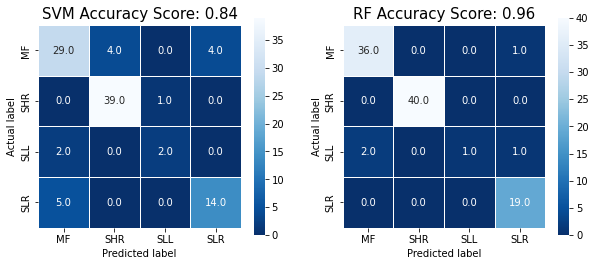

In [6]:
# ----------   IMPORT FIRST DATA-SET   --------------
import pandas as pd
import numpy as np

sensor_data = pd.read_csv('Dataset/sensor_readings_24.csv')
sensor_data = sensor_data.sample(frac=1) # shuffle the dataset
sensor_data = sensor_data.to_numpy()
ix = range(0, 24)
iy = 24
nl = 500
nt = 100
X = sensor_data[:, ix]
Y = sensor_data[:, iy]
XL = X[range(0, nl), :]
YL = Y[range(0, nl)]
XT = X[range(nl, nl + nt), :]
YT = Y[range(nl, nl + nt)]

# ----------   PRE-PROCESSING   --------------
from sklearn import preprocessing

scalerX = preprocessing.MinMaxScaler()
XL = scalerX.fit_transform(XL)
XT = scalerX.transform(XT)

# ----------   LEARN THE DATA   --------------
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

grid = {'C': np.logspace(-4,3,5),
        'kernel': ['linear', 'rbf']}

# find the best value for C (regularization parameter) and kernel type using cross validation set 
MS = GridSearchCV(estimator = SVC(),
                  param_grid = grid,
                  scoring = 'balanced_accuracy',
                  cv = 10,
                  verbose = 0)
H = MS.fit(XL,YL)

svm_clsf = SVC(C = H.best_params_['C'],
        kernel = H.best_params_['kernel'])

# train the SVM classifier model 
svm_clsf.fit(XL,YL)

# train the random forrest classifier model
rf_clsf = RandomForestClassifier(n_estimators = 1000)
rf_clsf.fit(XL,YL)

# ----------   TEST THE MODEL   --------------
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

YP_svm = svm_clsf.predict(XT)
YP_rf = rf_clsf.predict(XT)

# display confusion matrix (MF: move-forward, SLR: slight-right-turn, SHR: sharp-right-turn, SLL: slight-left-turn)
plt.figure(figsize=(10,4))
ax1 = plt.subplot(121)
sb.heatmap(confusion_matrix(YT, YP_svm), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r')
ax1.set_ylabel('Actual label')
ax1.set_xlabel('Predicted label')
plt.xticks([0.5,1.5,2.5,3.5], ['MF', 'SHR', 'SLL', 'SLR'])
plt.yticks([0.5,1.5,2.5,3.5], ['MF', 'SHR', 'SLL', 'SLR'])
all_sample_title = 'SVM Accuracy Score: {0}'.format(accuracy_score(YT, YP_svm))
ax1.set_title(all_sample_title, size = 15)
ax2 = plt.subplot(122)
sb.heatmap(confusion_matrix(YT, YP_rf), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r')
ax2.set_ylabel('Actual label')
ax2.set_xlabel('Predicted label')
plt.xticks([0.5,1.5,2.5,3.5], ['MF', 'SHR', 'SLL', 'SLR'])
plt.yticks([0.5,1.5,2.5,3.5], ['MF', 'SHR', 'SLL', 'SLR'])
all_sample_title = 'RF Accuracy Score: {0}'.format(accuracy_score(YT, YP_rf))
ax2.set_title(all_sample_title, size = 15)
plt.show()

#### 5. Multi-class classification with 4 dimensional data using Neural Network
The last part, considers the implementation of an artificial neural network for the second dataset. This neural network consists of input and output layers along with two hidden layers. For the first two layers, the actiovation function is chosen to be 'relu', in order to learn the data while avoiding gradient vanishing. For the third layer, the 'softmax' activation function is chosen, since we want to predict the class label. Additionally, all the layers are considered to be dense, since we are not trying to implement filters (convolutional layers). We could have used only one hidden layer, since the data can also be classified linearly, although the accuracy would be decreased. The number of nodes in the hidden layers are chosen arbitrarily with trial and error method.

<img src="nn.png" width=500 />

Once the model is built, we apply the gradient decent with 100 epochs, in order to implement early stopping, and in each epoch we use 128 samples of train data set. Finally, the model accuracy is tested and shown in the corresponding confusion matrix.

In [7]:
# ----------   IMPORT AND PREPROCESSING OF SECOND DATA-SET   --------------
import pandas as pd
import numpy as np
from sklearn import preprocessing
from tensorflow import keras

sensor_data = pd.read_csv('Dataset/sensor_readings_4.csv')
sensor_data = sensor_data.sample(frac=1) # shuffle the dataset
sensor_data = sensor_data.to_numpy()
ix = range(0, 4)
iy = 4
nl = 5000
nt = 455
X = sensor_data[:, ix]
Y = sensor_data[:, iy]
scalerX = preprocessing.MinMaxScaler()
X = scalerX.fit_transform(X)
XL = X[range(0, nl)]
XT = X[range(nl, nl + nt)]
YL = Y[range(0, nl)]
YT = Y[range(nl, nl + nt)]

YL = preprocessing.LabelEncoder().fit_transform(YL)
YT = preprocessing.LabelEncoder().fit_transform(YT)

c = 4
YL = keras.utils.to_categorical(YL,c)
YT = keras.utils.to_categorical(YT,c) 

In [8]:
# ----------   DEFINE THE LAYERS OF MODEL   --------------

model = keras.models.Sequential([
  keras.layers.Dense(12, activation='relu', input_shape=(iy,)),
  keras.layers.Dense(10, activation='relu'),
  keras.layers.Dense(c, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________


In [9]:
# ----------   LEARN THE DATA   --------------
epochs = 100
batch_size = 128
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
model.fit(XL,
          YL, 
          batch_size = batch_size,
          epochs = epochs,
          validation_split = .1)

Epoch 1/100
36/36 [==============================] - 2s 10ms/step - loss: 1.3385 - accuracy: 0.4460 - val_loss: 1.2894 - val_accuracy: 0.5680
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 1.2689 - accuracy: 0.5122 - val_loss: 1.2163 - val_accuracy: 0.4980
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 1.2168 - accuracy: 0.5264 - val_loss: 1.1697 - val_accuracy: 0.5820
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 1.1806 - accuracy: 0.5891 - val_loss: 1.1392 - val_accuracy: 0.6140
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 1.1489 - accuracy: 0.6029 - val_loss: 1.1137 - val_accuracy: 0.6280
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 1.1172 - accuracy: 0.6280 - val_loss: 1.0853 - val_accuracy: 0.6000
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 1.0833 - accuracy: 0.6136 - val_loss: 1.0540 - val_accuracy: 0.6440
Epoch 8/100


15/15 [==============================] - 0s 2ms/step


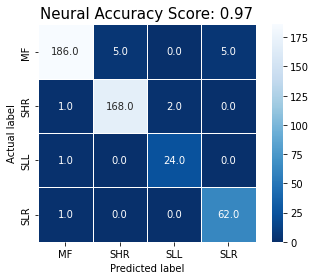

In [10]:
# ----------   TEST THE MODEL   --------------
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix, accuracy_score

YP = model.predict(XT)
YP = YP.argmax(1)
YT = YT.argmax(1)

# display confusion matrix (MF: move-forward, SLR: slight-right-turn, SHR: sharp-right-turn, SLL: slight-left-turn)
fig, ax = plt.subplots()
sb.heatmap(confusion_matrix(YT, YP), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
plt.xticks([0.5,1.5,2.5,3.5], ['MF', 'SHR', 'SLL', 'SLR'])
plt.yticks([0.5,1.5,2.5,3.5], ['MF', 'SHR', 'SLL', 'SLR'])
all_sample_title = 'Neural Accuracy Score: {0}'.format(round(accuracy_score(YT, YP),2))
ax.set_title(all_sample_title, size = 15)
plt.show()